In [15]:
rm(list = ls())
library(car)
library(mgcv)

In [16]:
# set you paths
setwd("D:/Working/03.Korea/연구조사론/MiddleTest")
data      <- read.table("reg.txt", header = T)
data.test <- read.table("reg_test.txt", header = T)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-34.46 -11.83  -3.01   5.26 452.66 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.9695     1.4900   6.020 3.41e-09 ***
x1            9.9912     1.4707   6.793 3.16e-11 ***
x2           11.6186     1.4762   7.871 2.25e-14 ***
x3            1.6804     1.4360   1.170    0.242    
x4           -0.8289     1.4015  -0.591    0.554    
x5           -1.3729     1.5227  -0.902    0.368    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33.19 on 494 degrees of freedom
Multiple R-squared:  0.1803,	Adjusted R-squared:  0.172 
F-statistic: 21.73 on 5 and 494 DF,  p-value: < 2.2e-16


M1 TRAIN MSE	[ 1088.159 ]
M1 TEST MSE	[ 299.5015 ]


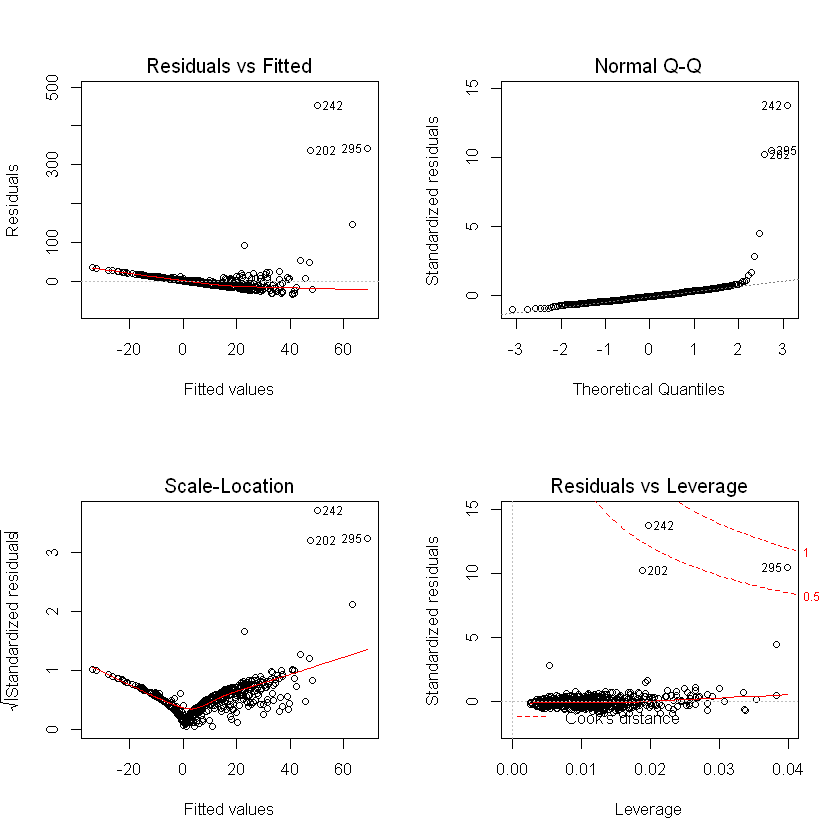

In [17]:
# Method1
par(mfrow=c(2,2));
obj1 <- lm(y ~ x1 + x2 + x3 + x4 + x5, data = data)
summary(obj1)
plot(obj1)

mse1.tr <- mean((fitted(obj1) - data[,1])^2)

hat.y1 <- predict(obj1, newdata = data.test[,-1])
mse1.ts <- mean((hat.y1 - data.test[,1])^2)

cat('M1 TRAIN MSE\t[', mse1.tr,']\n')
cat('M1 TEST MSE\t[', mse1.ts,']\n')

bcPower Transformation to Normality 
       Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
data$y   -0.0187           0      -0.0597       0.0222

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                            LRT df    pval
LR test, lambda = (0) 0.8049125  1 0.36963

Likelihood ratio test that no transformation is needed
                           LRT df       pval
LR test, lambda = (1) 2450.535  1 < 2.22e-16

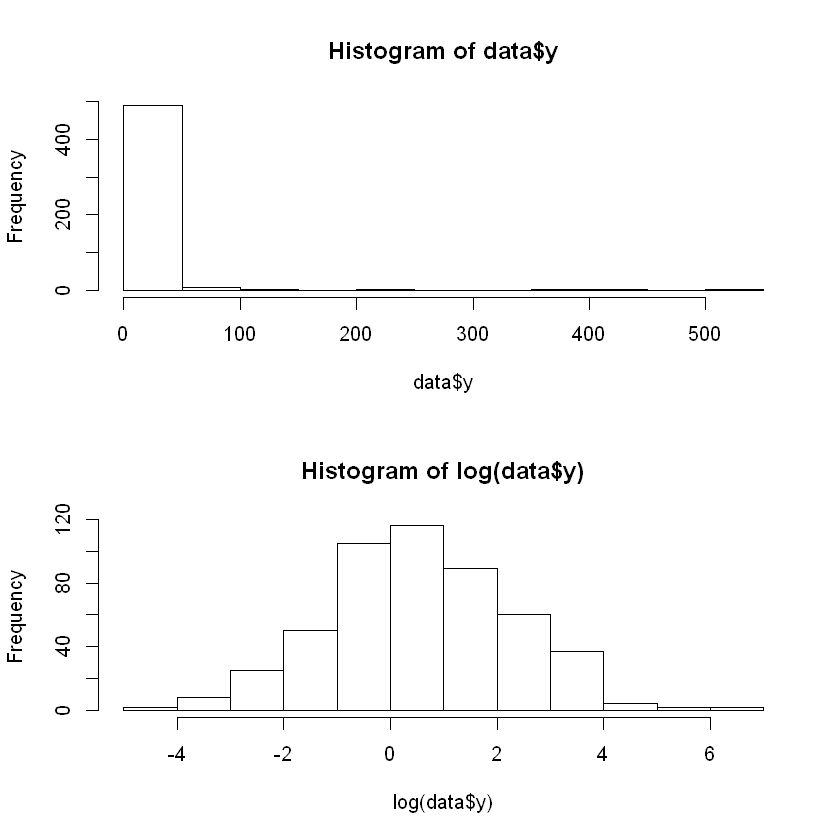

In [18]:
# Method 2
par(mfrow=c(2,1)); # 1,2 는 모양이 안좋아서 2,2 로 square 하게 만듬.
hist(data$y)
summary(powerTransform(data$y))
hist(log(data$y))


Call:
lm(formula = log.y ~ x1 + x2 + x3 + x4 + x5, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.59257 -0.67712 -0.02313  0.73646  2.70419 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5797444  0.0455749  12.721  < 2e-16 ***
x1           0.9949247  0.0449851  22.117  < 2e-16 ***
x2           1.0272315  0.0451517  22.751  < 2e-16 ***
x3          -0.0001518  0.0439230  -0.003  0.99724    
x4          -0.1296180  0.0428664  -3.024  0.00263 ** 
x5           0.0197511  0.0465759   0.424  0.67170    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.015 on 494 degrees of freedom
Multiple R-squared:  0.6668,	Adjusted R-squared:  0.6634 
F-statistic: 197.7 on 5 and 494 DF,  p-value: < 2.2e-16


M2 TRAIN MSE	[ 694.3791 ]
M2 TEST MSE	[ 229.5935 ]


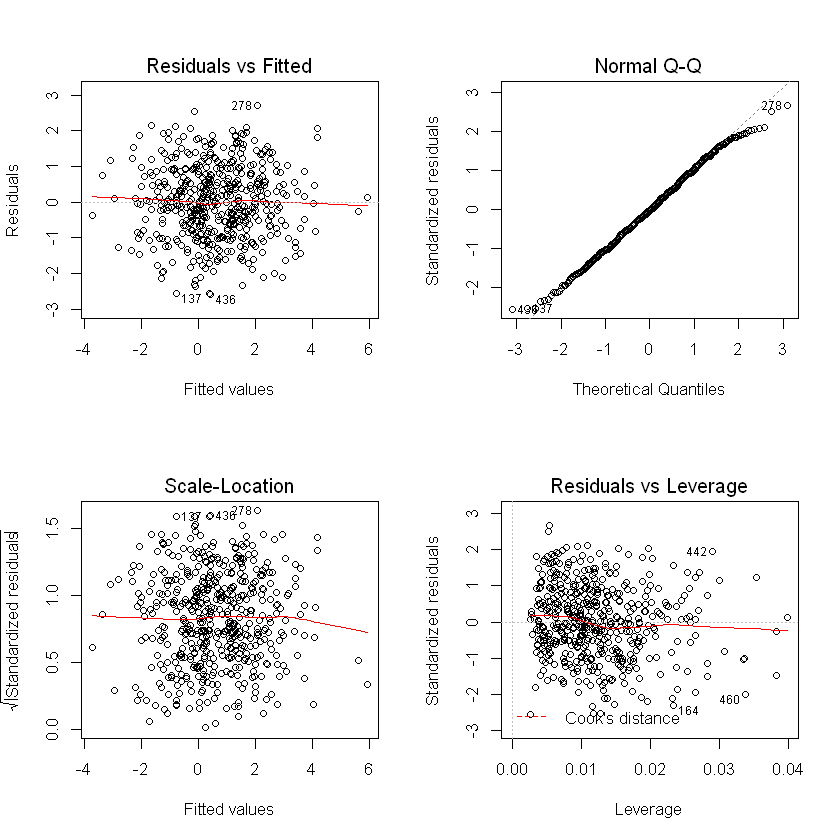

In [19]:
par(mfrow=c(2,2));
log.y <- log(data$y)
obj2 <- lm(log.y ~ x1 + x2 + x3 + x4 + x5, data = data)
summary(obj2)
plot(obj2)

mse2.tr <- mean((exp(fitted(obj2)) - data[,1])^2)

hat.log.y2 <- predict(obj2, newdata = data.test[,-1])
hat.y2 <- exp(hat.log.y2)
mse2.ts <- mean((hat.y2 - data.test[,1])^2)

cat('M2 TRAIN MSE\t[', mse2.tr,']\n')
cat('M2 TEST MSE\t[', mse2.ts,']\n')

Start:  AIC=46.23
log.y ~ x1 + x2 + x3 + x4 + x5

       Df Sum of Sq     RSS    AIC
- x3    1      0.00  509.02  40.02
- x5    1      0.19  509.21  40.20
<none>               509.02  46.23
- x4    1      9.42  518.44  49.18
- x1    1    504.03 1013.05 384.13
- x2    1    533.33 1042.36 398.39

Step:  AIC=40.02
log.y ~ x1 + x2 + x4 + x5

       Df Sum of Sq     RSS    AIC
- x5    1      0.19  509.21  33.98
<none>               509.02  40.02
- x4    1      9.42  518.45  42.97
+ x3    1      0.00  509.02  46.23
- x1    1    504.71 1013.73 378.25
- x2    1    533.79 1042.81 392.39

Step:  AIC=33.98
log.y ~ x1 + x2 + x4

       Df Sum of Sq     RSS    AIC
<none>               509.21  33.98
- x4    1      9.27  518.48  36.79
+ x5    1      0.19  509.02  40.02
+ x3    1      0.00  509.21  40.20
- x1    1    504.67 1013.88 372.11
- x2    1    537.14 1046.35 387.87



Call:
lm(formula = log.y ~ x1 + x2 + x4, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.59008 -0.69110 -0.01775  0.73298  2.71382 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.57951    0.04549  12.740  < 2e-16 ***
x1           0.99422    0.04484  22.172  < 2e-16 ***
x2           1.02843    0.04496  22.874  < 2e-16 ***
x4          -0.12820    0.04265  -3.006  0.00278 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.013 on 496 degrees of freedom
Multiple R-squared:  0.6666,	Adjusted R-squared:  0.6646 
F-statistic: 330.6 on 3 and 496 DF,  p-value: < 2.2e-16


,x1,x2,x3,x4,x5
501,0.07730312,0.85004347,-1.805483556,0.52059968,1.557953726
502,-0.29686864,-0.92531300,-0.678040682,0.37756192,-0.729297009
503,-1.18324224,0.89358121,-0.473358051,-0.62365881,-1.503950878
504,0.01129269,-0.94100974,1.027417079,-0.57261053,-0.566786996
505,0.99160104,0.53895209,-0.597387569,0.31250115,-2.104453622
506,1.59396745,-0.18197440,1.159849377,-0.70742783,0.530731928
507,-1.37271127,0.89176759,-1.333226880,0.52120349,1.617684135
508,-0.24961093,1.32920821,-0.925755662,0.44818798,1.184531857
509,1.15942453,-0.10346613,-1.074495125,-0.50532261,1.876333367
510,-1.11422235,0.61506461,-1.451116495,-0.20661215,-0.455775876


M3 TRAIN MSE	[ 692.0019 ]
M3 TEST MSE	[ 225.6184 ]


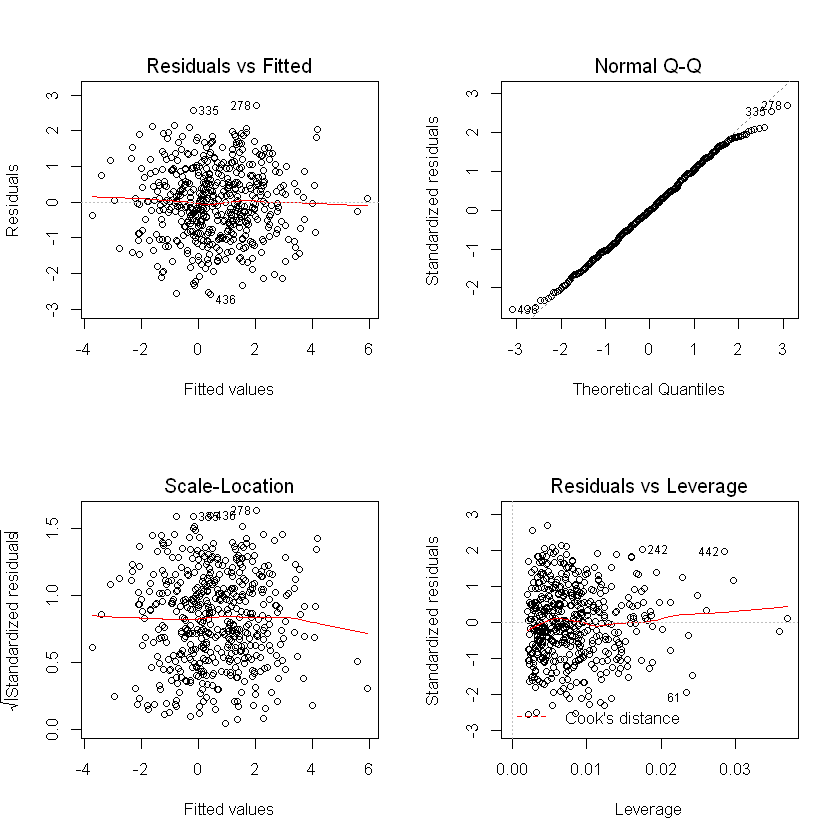

In [20]:
# Method 3
#install.packages('MASS')
library(MASS)
par(mfrow=c(2,2));
step <- stepAIC(obj2, direction="both", k = log(nrow(data)))
summary(step)

obj3 <- lm(log.y ~ x1 + x2 + x4, data = data)
plot(obj3)

mse3.tr <- mean((exp(fitted(obj3)) - data[,1])^2)
hat.log.y3 <- predict(obj3, newdata = data.test[,-1])
data.test[,-1]
hat.y3 <- exp(hat.log.y3)
mse3.ts <- mean((hat.y3 - data.test[,1])^2)

cat('M3 TRAIN MSE\t[', mse3.tr,']\n')
cat('M3 TEST MSE\t[', mse3.ts,']\n')


Family: gaussian 
Link function: identity 

Formula:
log.y ~ s(x1, k = 4) + s(x2, k = 4) + s(x3, k = 4) + s(x4, k = 4) + 
    s(x5, k = 4)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.58743    0.04191   14.02   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
        edf Ref.df       F  p-value    
s(x1) 1.368  1.644 348.572  < 2e-16 ***
s(x2) 1.000  1.000 612.119  < 2e-16 ***
s(x3) 2.806  2.973  29.121  2.8e-16 ***
s(x4) 1.000  1.000  13.364 0.000283 ***
s(x5) 1.387  1.672   0.138 0.840073    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.713   Deviance explained = 71.7%
GCV = 0.89362  Scale est. = 0.87831   n = 500

M4 TRAIN MSE	[ 666.6579 ]
M4 TEST MSE	[ 237.4722 ]


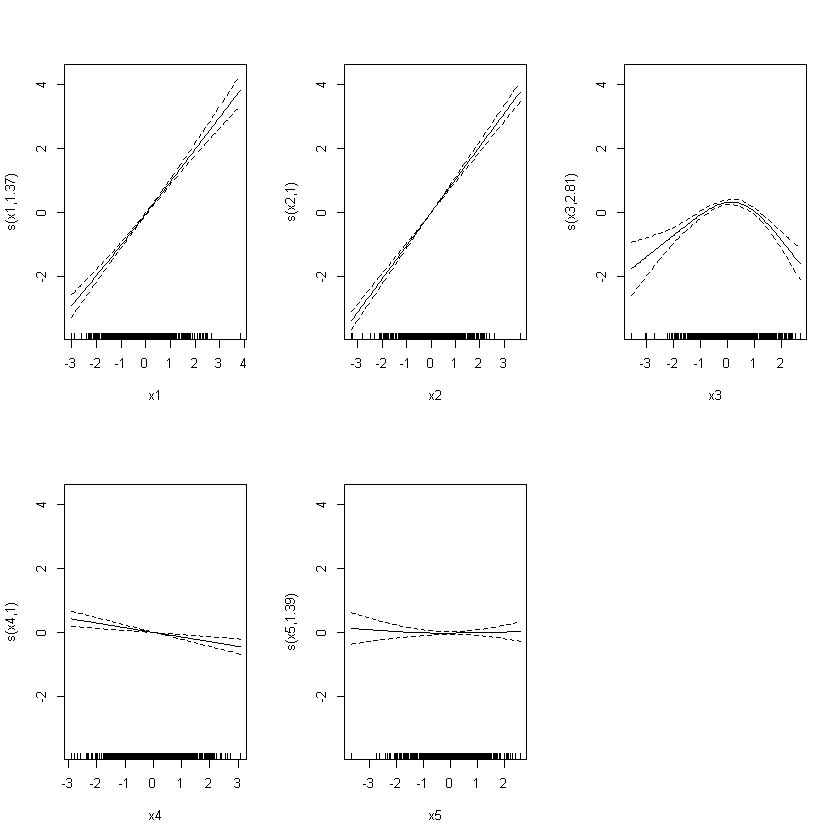

In [31]:
# Method 4
obj4 <- gam(log.y ~ s(x1, k = 4) + s(x2, k = 4) + s(x3, k = 4)+ s(x4, k = 4)+ s(x5, k = 4), data = data)
summary(obj4)
plot(obj4, pages=1)

mse4.tr <- mean((exp(fitted(obj4)) - data[,1])^2)
hat.log.y4 <- predict(obj4, newdata = data.test[,-1])
hat.y4 <- exp(hat.log.y4)
mse4.ts <- mean((hat.y4 - data.test[,1])^2)

cat('M4 TRAIN MSE\t[', mse4.tr,']\n')
cat('M4 TEST MSE\t[', mse4.ts,']\n')

In [30]:
idx <- seq.int(4)
mse_train <- c(mse1.tr, mse2.tr, mse3.tr, mse4.tr)
mse_test <- c(mse1.ts, mse2.ts, mse3.ts, mse4.ts)

result_mse <- data.frame(idx, mse_train, mse_test)
result_mse

idx,mse_train,mse_test
1,1088.1585,299.5015
2,694.3791,229.5935
3,692.0019,225.6184
4,737.3452,197.5643
